In [137]:
# import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings

warnings.filterwarnings(action="ignore")

In [138]:
# set data
data_path = "/opt/ml/input/data/train/"
train = pd.read_csv(os.path.join(data_path, "train_ratings.csv"))
directors = pd.read_csv(os.path.join(data_path, "directors.tsv"), sep="\t")
genres = pd.read_csv(os.path.join(data_path, "genres.tsv"), sep="\t")
titles = pd.read_csv(os.path.join(data_path, "titles.tsv"), sep="\t")
writers = pd.read_csv(os.path.join(data_path, "writers.tsv"), sep="\t")
years = pd.read_csv(os.path.join(data_path, "years.tsv"), sep="\t")
train

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563
...,...,...,...
5154466,138493,44022,1260209449
5154467,138493,4958,1260209482
5154468,138493,68319,1260209720
5154469,138493,40819,1260209726


# Year.tsv 확인하기

In [139]:
years.isnull().sum()

item    0
year    0
dtype: int64

In [140]:
years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6799 entries, 0 to 6798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6799 non-null   int64
 1   year    6799 non-null   int64
dtypes: int64(2)
memory usage: 106.4 KB


In [141]:
years["year"].describe()

count    6799.000000
mean     1992.174732
std        19.052568
min      1922.000000
25%      1985.000000
50%      1999.000000
75%      2006.000000
max      2014.000000
Name: year, dtype: float64

* 1922년부터 2014년까지의 정보가 있다

In [142]:
min_year = years["year"].min()
max_year = years["year"].max()
print(f"min year: {min_year}, max year: {max_year}")

min year: 1922, max year: 2014


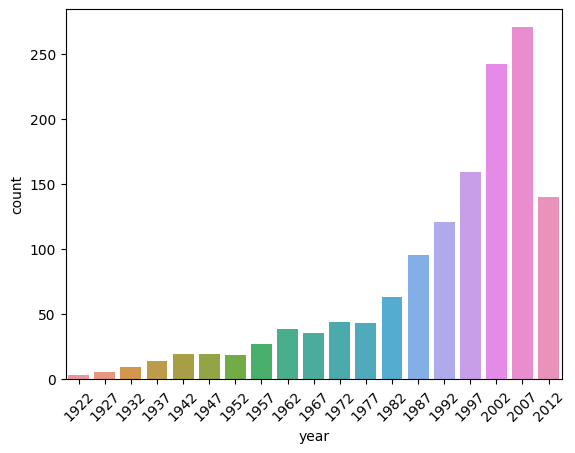

In [143]:
sns.countplot(data=years, x="year", order=range(min_year, max_year, 5))
plt.xticks(rotation=45)
plt.show()

* year 값의 분포이다

In [144]:
print(f"Year data shape: {years.shape}")
print(f"number of items: {years['item'].nunique()}")
print(f"number of years: {years['year'].nunique()}")

Year data shape: (6799, 2)
number of items: 6799
number of years: 93


# 결측치 처리하기

In [145]:
train.shape

(5154471, 3)

In [146]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154471 entries, 0 to 5154470
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   user    int64
 1   item    int64
 2   time    int64
dtypes: int64(3)
memory usage: 118.0 MB


In [147]:
train.describe()

,user,item,time
count,5.154471e+06,5.154471e+06,5.154471e+06
mean,6.875153e+04,1.716849e+04,1.248017e+09
std,3.993460e+04,2.633563e+04,8.968302e+07
min,1.100000e+01,1.000000e+00,1.113221e+09
25%,3.419900e+04,1.304000e+03,1.170355e+09
50%,6.860500e+04,3.897000e+03,1.234651e+09
75%,1.032010e+05,2.671200e+04,1.318284e+09
max,1.384930e+05,1.191450e+05,1.427781e+09


In [148]:
train.nunique()

user      31360
item       6807
time    5074973
dtype: int64

In [149]:
len(set(train["item"]))

6807

In [150]:
len(set(years["item"]))

6799

In [151]:
len(set(train["item"]) - set(years["item"]))

8

* train에서 8개의 item에 대해서 year 값이 years.tsv 데이터에 존재하지 않는다

In [152]:
train = pd.merge(train, years, how="outer")
train.isnull().sum()

user       0
item       0
time       0
year    1832
dtype: int64

* year 정보가 없는 8개의 item 결측값이 전체 train에서 1832개의 결측값을 만들고 있다

In [153]:
item_list = list(train[train["year"].isnull()]["item"].unique())
item_list

[6987, 3310, 7243, 8511, 32898, 7065, 119145, 6988]

* year 정보가 없는 8개의 item이다. 이들의 year 정보 결측치를 채워서 years.tsv를 다시 만들자
* item의 title에서 year의 정보를 찾아서 결측치를 채우자

In [154]:
train = pd.merge(train, titles, how="outer")
train.isnull().sum()

user        0
item        0
time        0
year     1832
title       0
dtype: int64

In [155]:
item_title = train[train["item"] == item_list[0]].iloc[0, 4].split()[-1][1:-1]
item_title

'1920'

In [156]:
years

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
...,...,...
6794,114795,2014
6795,110771,2014
6796,112804,2014
6797,113378,2014


In [157]:
for i in range(0, 8):
    item_title = train[train["item"] == item_list[i]].iloc[0, 4].split()[-1][1:-1]
    years.loc[len(years)] = {"item": item_list[i], "year": item_title}

In [158]:
years["year"] = years["year"].astype("int64")
years = years.sort_values(["year"])

In [159]:
years["year"].dtype

dtype('int64')

In [160]:
years.head(20)

,item,year
6803,32898,1902
6804,7065,1915
6801,7243,1916
6802,8511,1917
6806,6988,1919
6799,6987,1920
6800,3310,1921
0,1348,1922
1,44587,1922
2,4768,1922


In [161]:
years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6807 entries, 6803 to 6805
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   item    6807 non-null   int64
 1   year    6807 non-null   int64
dtypes: int64(2)
memory usage: 159.5 KB


In [162]:
years.describe()

,item,year
count,6807.000000,6807.000000
mean,26626.948142,1992.099456
std,32194.062445,19.201400
min,1.000000,1902.000000
25%,3054.500000,1985.000000
50%,6882.000000,1999.000000
75%,49823.000000,2006.000000
max,119145.000000,2015.000000


* 결측치를 채운 결과, min year는 1902로 바뀌었고, max year는 2015로 바뀌었다

# 검증

In [163]:
new_years = years.reset_index().drop(["index"], axis=1)
years = pd.read_csv(os.path.join(data_path, "years.tsv"), sep="\t")

In [164]:
new_years.head(10)

,item,year
0,32898,1902
1,7065,1915
2,7243,1916
3,8511,1917
4,6988,1919
5,6987,1920
6,3310,1921
7,1348,1922
8,44587,1922
9,4768,1922


In [165]:
years.head(10)

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
5,25750,1924
6,25753,1924
7,4405,1924
8,7074,1924
9,7302,1924


In [166]:
new_years.tail(10)

,item,year
6797,114662,2014
6798,115210,2014
6799,109487,2014
6800,109740,2014
6801,109578,2014
6802,113829,2014
6803,112421,2014
6804,108945,2014
6805,112175,2014
6806,119145,2015


In [167]:
years.tail(10)

,item,year
6789,108928,2014
6790,112370,2014
6791,109846,2014
6792,113225,2014
6793,111743,2014
6794,114795,2014
6795,110771,2014
6796,112804,2014
6797,113378,2014
6798,109850,2014


In [168]:
print(f"Shape of years: {years.shape}")
print(f"Shape of new years: {new_years.shape}")
print(f"Number of unique year in years:\n{years.nunique()}")
print(f"Number of unique year in new years:\n{new_years.nunique()}")

Shape of years: (6799, 2)
Shape of new years: (6807, 2)
Number of unique year in years:
item    6799
year      93
dtype: int64
Number of unique year in new years:
item    6807
year     101
dtype: int64


* 새로 추가된 year는 기존에 존재하지 않던 새로운 year 값이다

In [169]:
new_years.to_csv(os.path.join(data_path, "new_years.tsv"), sep="\t", index=False)

* 결측치를 채워준 새로운 new_years.tsv를 생성한다

In [170]:
train = pd.read_csv(os.path.join(data_path, "train_ratings.csv"))
directors = pd.read_csv(os.path.join(data_path, "directors.tsv"), sep="\t")
genres = pd.read_csv(os.path.join(data_path, "genres.tsv"), sep="\t")
titles = pd.read_csv(os.path.join(data_path, "titles.tsv"), sep="\t")
writers = pd.read_csv(os.path.join(data_path, "writers.tsv"), sep="\t")
years = pd.read_csv(os.path.join(data_path, "new_years.tsv"), sep="\t")

In [171]:
train = pd.merge(train, years, how="outer")
train.isnull().sum()

user    0
item    0
time    0
year    0
dtype: int64

* 결측치가 처리된 것을 볼 수 있다

# 다른 정보와 결합해서 EDA 진행하기

In [172]:
train = pd.merge(train, directors, how="outer")
train = pd.merge(train, genres, how="outer")
train = pd.merge(train, titles, how="outer")
train = pd.merge(train, writers, how="outer")
train

,user,item,time,year,director,genre,title,writer
0,11,4643,1230782529,2001,nm0000318,Action,Planet of the Apes (2001),nm0099541
1,11,4643,1230782529,2001,nm0000318,Action,Planet of the Apes (2001),nm0115310
2,11,4643,1230782529,2001,nm0000318,Action,Planet of the Apes (2001),nm0465199
3,11,4643,1230782529,2001,nm0000318,Action,Planet of the Apes (2001),nm0742797
4,11,4643,1230782529,2001,nm0000318,Adventure,Planet of the Apes (2001),nm0099541
...,...,...,...,...,...,...,...,...
48264326,134144,102880,1371381972,2013,nm0796117,Action,After Earth (2013),nm1729428
48264327,134144,102880,1371381972,2013,nm0796117,Adventure,After Earth (2013),nm0796117
48264328,134144,102880,1371381972,2013,nm0796117,Adventure,After Earth (2013),nm1729428
48264329,134144,102880,1371381972,2013,nm0796117,Sci-Fi,After Earth (2013),nm0796117


In [173]:
train.isnull().sum()

user              0
item              0
time              0
year              0
director    1184231
genre             0
title             0
writer       695889
dtype: int64

## user와 year의 관계 알아보기

In [174]:
train["user"].nunique()

31360

In [175]:
def min_max_year(s):
    return s.min(), s.max()

In [176]:
user_year = train.groupby(["user"]).agg({"year": min_max_year})
user_year.head(20)

,year
user,
11,"(1941, 2009)"
14,"(1925, 2008)"
18,"(1952, 2009)"
25,"(1939, 2008)"
31,"(1974, 2014)"
35,"(1954, 2007)"
43,"(1974, 2008)"
50,"(1940, 2006)"
58,"(1934, 2005)"


* user와 year을 비교하는 것에서 유의미한 결론은 없는 것 같다
* year는 영화의 개봉연도이기에, 2015년에도 1902년 영화를 볼 수 있다
* 유저 별 시청 년도를 비교하는 것은 user와 timestamp를 비교해야 할 것으로 보인다

## director와 year의 관계 알아보기

In [177]:
train["director"].nunique()

1340

In [178]:
user_year = train.groupby(["director"]).agg({"year": min_max_year})
user_year.head(20)

,year
director,
nm0000005,"(1953, 2003)"
nm0000019,"(1953, 1973)"
nm0000033,"(1927, 1976)"
nm0000036,"(1923, 1928)"
nm0000037,"(1949, 1976)"
nm0000040,"(1955, 1999)"
nm0000041,"(1948, 1990)"
nm0000045,"(1972, 1978)"
nm0000059,"(1944, 1955)"


* 감독 별 제작한 영화의 출시 년도 정보이다
* 어떠한 의미를 유도할 수 있을까..?

## genre와 year의 관계 알아보기

In [179]:
train["genre"].nunique()

18

In [180]:
genre_list = list(train["genre"].unique())
min_year = years["year"].min()
max_year = years["year"].max()

In [185]:
tmp_genres = pd.read_csv(os.path.join(data_path, "genres.tsv"), sep="\t")
tmp_years = pd.read_csv(os.path.join(data_path, "new_years.tsv"), sep="\t")
genre_data = pd.merge(tmp_genres, tmp_years, how="inner")
genre_data

,item,genre,year
0,318,Crime,1994
1,318,Drama,1994
2,2571,Action,1999
3,2571,Sci-Fi,1999
4,2571,Thriller,1999
...,...,...,...
15928,109850,Drama,2014
15929,8605,Action,2003
15930,8605,Comedy,2003
15931,3689,Comedy,1983


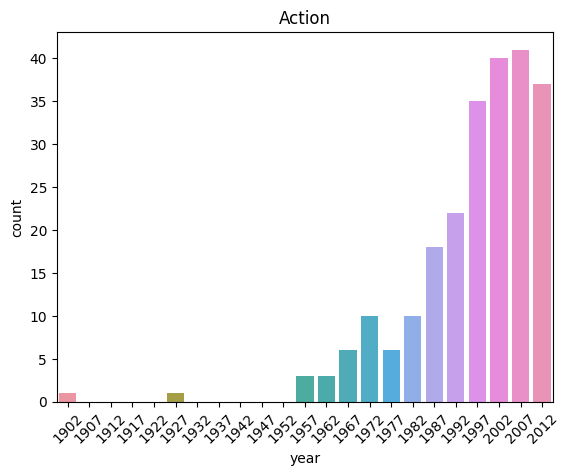

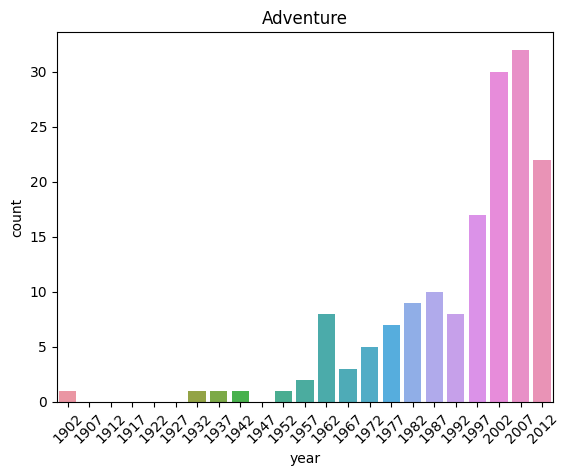

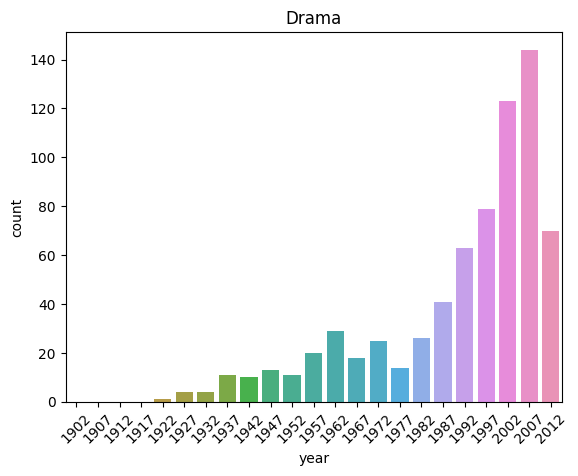

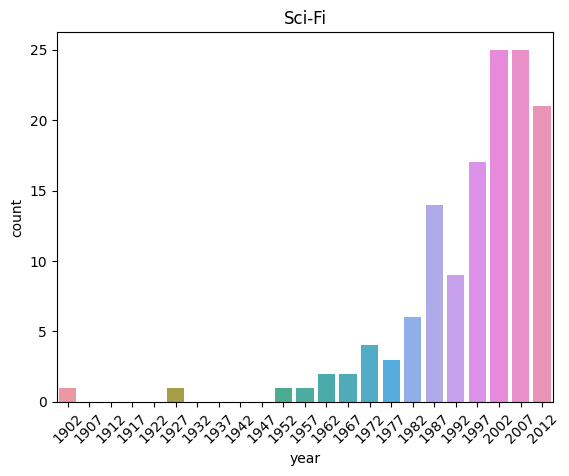

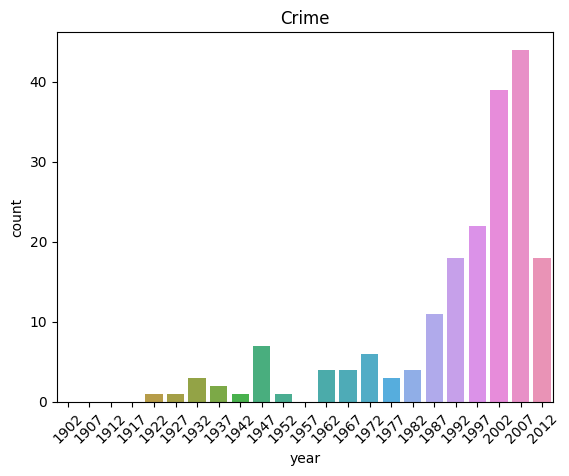

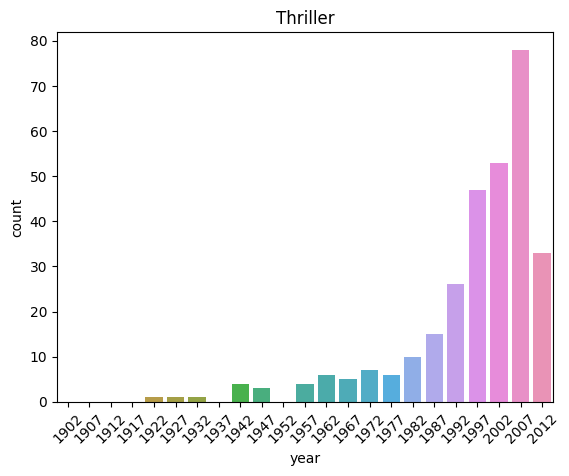

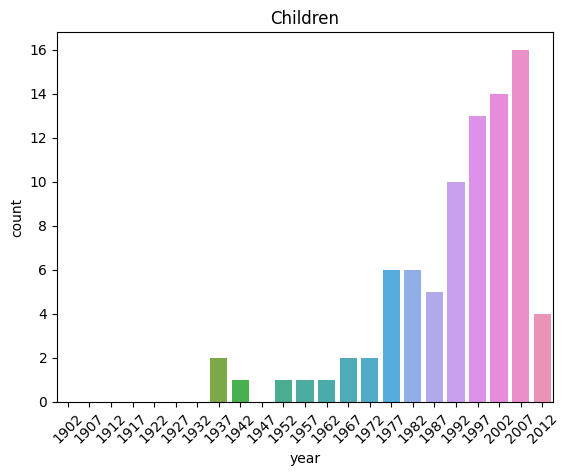

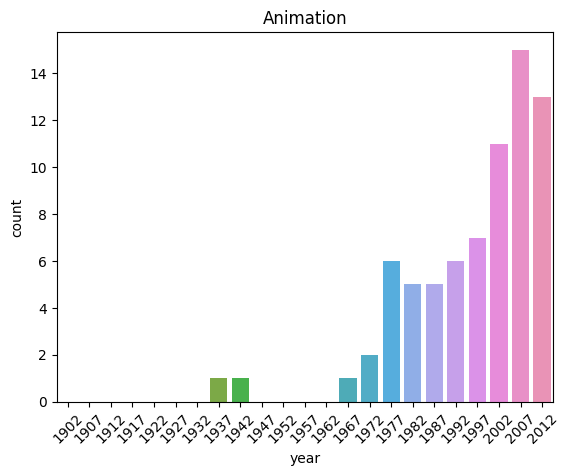

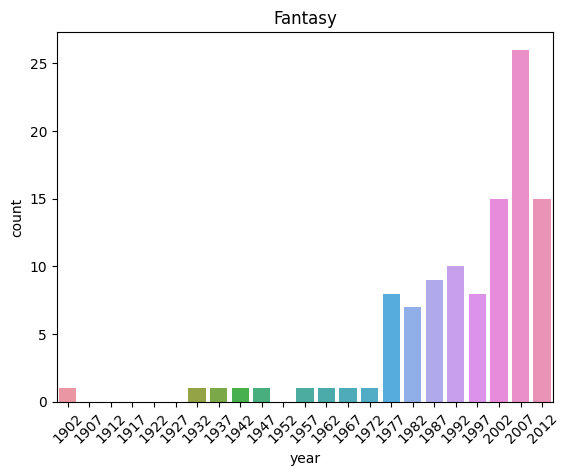

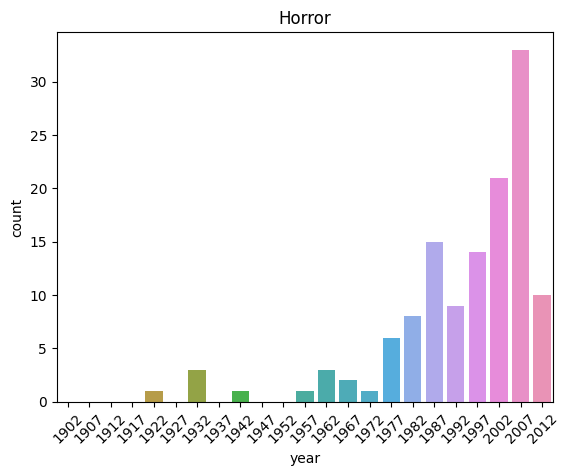

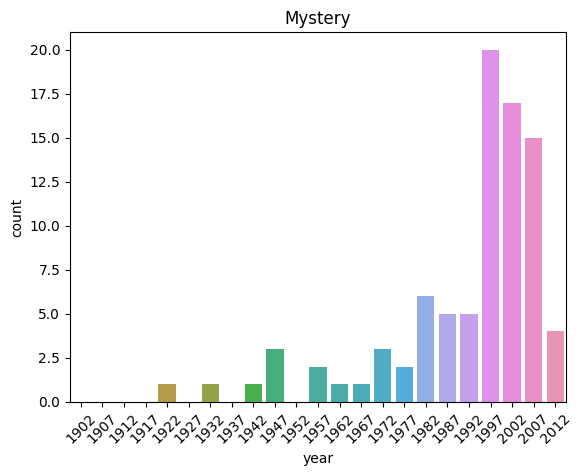

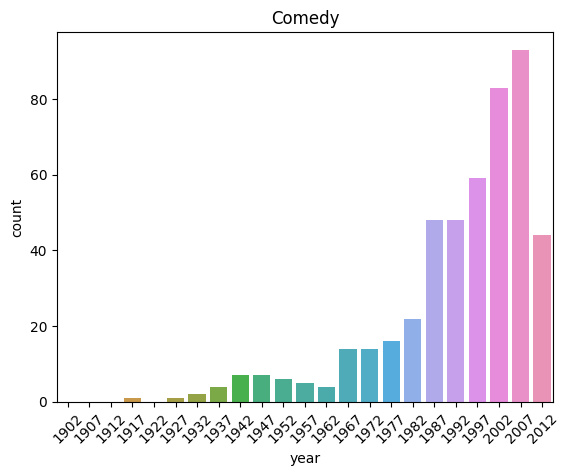

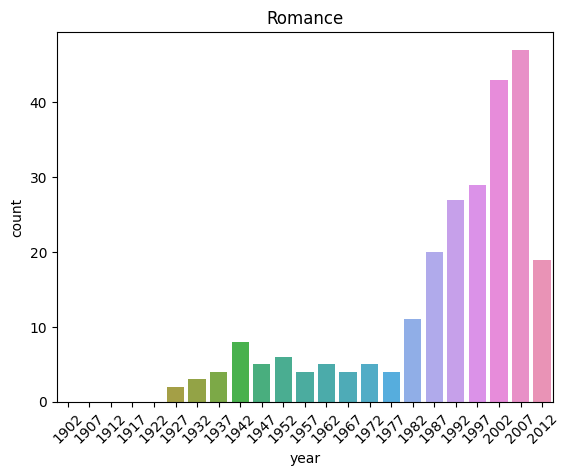

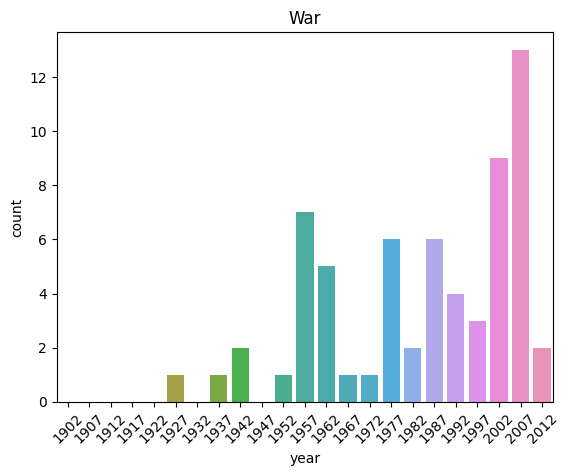

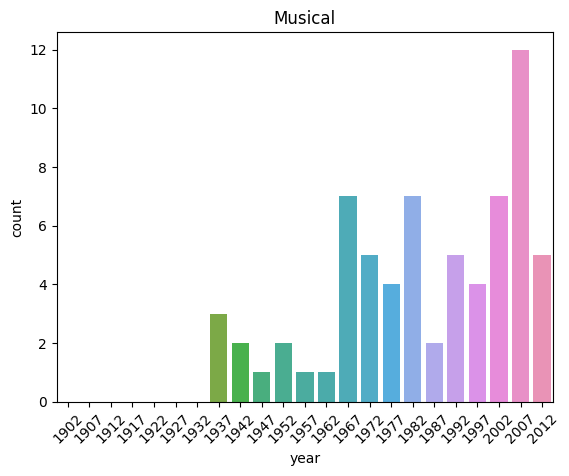

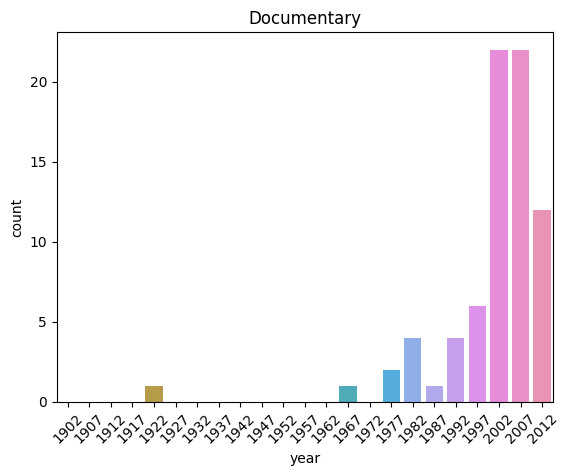

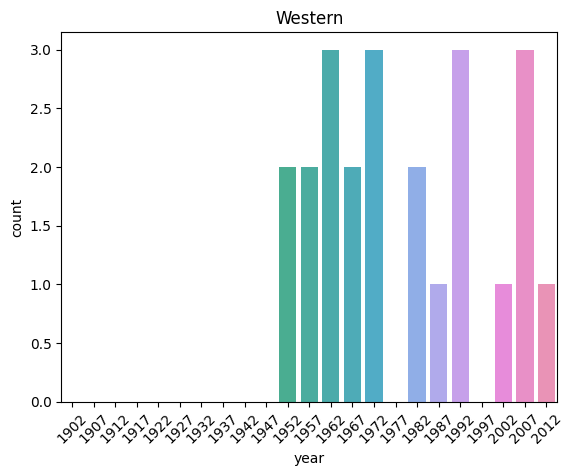

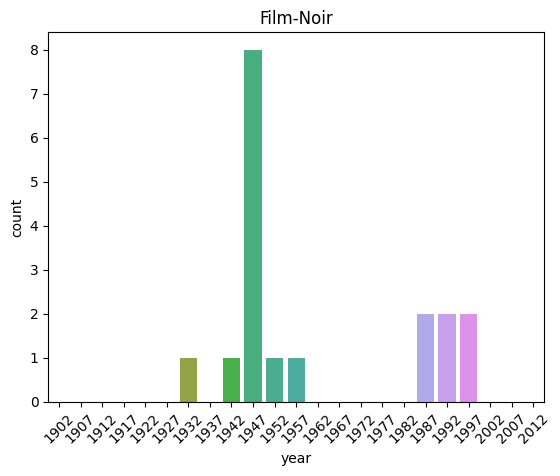

In [187]:
for i in range(18):
    specific_genre_data = genre_data[genre_data["genre"] == genre_list[i]]
    sns.countplot(
        data=specific_genre_data, x="year", order=range(min_year, max_year, 5)
    ).set_title(genre_list[i])
    plt.xticks(rotation=45)
    plt.show()

* 해당 장르가 유행하던 시기를 대략적으로 파악해볼 수는 있음
* 표본 수가 적은 장르의 경우, 주의해서 봐야함

## writer와 year의 관계 알아보기

In [182]:
train["writer"].nunique()

2989

In [183]:
user_year = train.groupby(["writer"]).agg({"year": min_max_year})
user_year.head(20)

,year
writer,
nm0000005,"(1953, 2003)"
nm0000019,"(1945, 1973)"
nm0000033,"(1927, 1946)"
nm0000036,"(1926, 1935)"
nm0000040,"(1955, 1999)"
nm0000041,"(1948, 1996)"
nm0000045,"(1972, 1978)"
nm0000059,"(1944, 1955)"
nm0000076,"(1959, 1980)"


* 작가 별 대본을 작성한 영화의 출시 년도 정보이다
* 어떠한 의미를 유도할 수 있을까..?